# SVM (Support Vector Machine)

This python notebook is of just SVM and the HEp2 Cells dataset.  SIFT extraction with the model is in another notebook.

# Image Related Functions

This code defines a function called display_image that uses the matplotlib.pyplot library to display an image. It takes the image data and an optional title as input. The function sets the colormap to 'gray' for grayscale display, sets the title of the plot, and turns off the axis labels for a cleaner look. Finally, it uses plt.show() to display the image. This function provides a simple way to visualize image data within a Python script or notebook.

In [3]:
# import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import random

def display_image(image, title="Image"):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')  # Hide axis
    plt.show()


# Label Loading Functions

This code snippet defines two functions for loading and analyzing image labels. load_labels reads a MATLAB (.mat) file containing labels, extracts the 'labels' array, flattens it into a 1D array, and optionally truncates it to a specified number of labels. print_label_distribution takes the loaded labels as input and calculates the distribution of each unique label, displaying the count and percentage of each label in the dataset. This provides a summary of the label frequencies, which is valuable for understanding the dataset's composition and potential class imbalances.

In [11]:
# label loading code
import scipy.io
import numpy as np

def load_labels(mat_file, num_labels=63445):
    print("Loading labels...")
    labels = scipy.io.loadmat(mat_file)['labels'].flatten()[:num_labels]
    print(f"Loaded {len(labels)} labels.\n")
    return labels

def print_label_distribution(labels):
    unique, counts = np.unique(labels, return_counts=True)
    total = len(labels)
    print("Label Distribution:")
    for label, count in zip(unique, counts):
        percentage = (count / total) * 100
        print(f"Label {label}: {count} ({percentage:.2f}%)")


# Preprocessing Function

This Python code preprocesses a set of images located in a specified directory. It iterates through a given number of image files (PNG format), reading each image in grayscale, resizing it to 64x64 pixels, and normalizing its pixel values to a range between 0 and 1. If an image file is not found, it prints a warning message. The function provides progress updates every 5000 images processed and finally returns an array containing all the preprocessed images. This preprocessing step is crucial in computer vision tasks to standardize image data and potentially reduce computational complexity for subsequent analysis or model training.

In [ ]:
# preprocessing code
import cv2
import numpy as np
import os

def preprocess_images(image_dir, num_images):
    print("Preprocessing images...")
    images = []
    for i in range(1, num_images + 1):
        img_path = os.path.join(image_dir, f"{i}.png")
        if not os.path.exists(img_path):
            print(f"Warning: Image {img_path} not found")
            continue

        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (64, 64))
        image = image / 255.0
        images.append(image)

        if i % 5000 == 0:
            print(f"Processed images {i-4999}-{i}")
    
    print("Finished preprocessing images.\n")
    return np.array(images)


# Data Splitting, Model Building, Training, Validation, and Testing Functions

This code defines a function train_and_evaluate that takes image features (X) and labels (y) as input, along with a sample size. It first samples a subset of the data (25,000 of the 63,000) to manage computational resources. Then, it splits this sampled data into training, validation, and testing sets.  A StandardScaler is used to standardize the features, which is crucial for many machine learning algorithms like SVMs.  The code then trains an SVM model with a linear kernel using the training data.  The trained model is validated using the validation set, and performance metrics like accuracy and a classification report are printed. Finally, the model is tested on the held-out test set to assess its generalization ability, again reporting the accuracy and classification report. This function encapsulates a standard machine learning workflow of data splitting, preprocessing, training, validation, and testing.

In [17]:
# functions for splitting the data, building the model, training it, validating it, and testing it.
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

def train_and_evaluate(X, y, sample_size):
    print("Starting training and evaluation...")

    # Convert to float32 to save memory
    X = X.astype(np.float32)

    # Sample images directly from the original dataset
    X_sampled, _, y_sampled, _ = train_test_split(X, y, train_size=sample_size, random_state=42)
    print(f"Sampled data shape: {X_sampled.shape}")

    # Split the sampled data into new training, validation, and testing datasets
    X_train, X_temp, y_train, y_temp = train_test_split(X_sampled, y_sampled, test_size=0.4, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    print(f"Sampled data split: {len(X_train)} training, {len(X_val)} validation, {len(X_test)} testing samples")

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    print("Data standardized")

    # Build and train the SVM model
    svm_model = SVC(kernel='linear')
    print("Training SVM model...")
    svm_model.fit(X_train, y_train)
    print("SVM model trained")

    # Validate the model
    print("Validating model...")
    y_val_pred = svm_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Validation Accuracy: {val_accuracy}")
    print("Validation Classification Report:")
    print(classification_report(y_val, y_val_pred))

    # Test the model
    print("Testing model...")
    y_test_pred = svm_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy: {test_accuracy}")
    print("Test Classification Report:")
    print(classification_report(y_test, y_test_pred))


# Main Function

This Python code performs image classification using a Support Vector Machine (SVM) model. It begins by loading image labels from a MAT file and preprocessing a set of images from a specified directory.  The preprocessed images are then flattened and used as features to train an SVM model. After training, the code evaluates the model's performance, likely using metrics like accuracy or precision. This script appears designed for a specific dataset of cell images, with hardcoded paths and image counts.

Loading labels...
Loaded 63445 labels.

Label Distribution:
Label 1: 14367 (22.64%)
Label 2: 14655 (23.10%)
Label 3: 13257 (20.90%)
Label 4: 13737 (21.65%)
Label 5: 5086 (8.02%)
Label 6: 2343 (3.69%)
Preprocessing images...
Processed images 1-5000
Processed images 5001-10000
Processed images 10001-15000
Processed images 15001-20000
Processed images 20001-25000
Processed images 25001-30000
Processed images 30001-35000
Processed images 35001-40000
Processed images 40001-45000
Processed images 45001-50000
Processed images 50001-55000
Processed images 55001-60000
Finished preprocessing images.



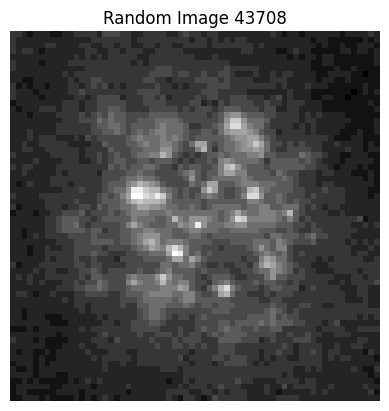

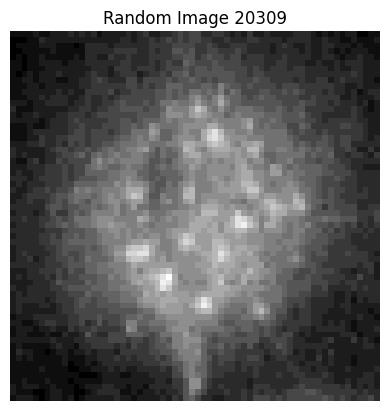

Starting training and evaluation...
Sampled data shape: (25000, 4096)
Sampled data split: 15000 training, 5000 validation, 5000 testing samples
Data standardized
Training SVM model...
SVM model trained
Validating model...
Validation Accuracy: 0.4604
Validation Classification Report:
              precision    recall  f1-score   support

           1       0.42      0.55      0.48      1112
           2       0.46      0.45      0.46      1193
           3       0.47      0.50      0.48      1001
           4       0.46      0.30      0.36      1104
           5       0.51      0.58      0.54       405
           6       0.65      0.47      0.55       185

    accuracy                           0.46      5000
   macro avg       0.50      0.47      0.48      5000
weighted avg       0.46      0.46      0.46      5000

Testing model...
Test Accuracy: 0.478
Test Classification Report:
              precision    recall  f1-score   support

           1       0.44      0.58      0.50      112

In [4]:
# main function
from sift_svm_local4_label_utils import load_labels, print_label_distribution
from sift_svm_local4_image_utils import display_image, save_image_plot
from sift_svm_local4_preprocessing import preprocess_images
from sift_svm_local4_training_i import train_and_evaluate
import numpy as np
import random

def display_random_images(images, num_images=5):
    random_indices = random.sample(range(len(images)), num_images)
    for i in random_indices:
        display_image(images[i], title=f"Random Image {i + 1}")

def main():
    # Local directory paths
    image_dir = 'cells'  # Directory containing images
    mat_file = 'labels.mat'  # Labels file
    num_images = 63445

    # Load labels and preprocess images
    labels = load_labels(mat_file, num_labels=num_images)
    print_label_distribution(labels)
    images = preprocess_images(image_dir, num_images)

    # Display 2 random images from the dataset
    display_random_images(images, num_images=2)

    # Flatten the preprocessed images and create a feature matrix
    X = np.array([image.flatten() for image in images])
    y = np.array(labels)

    # Train and evaluate the model
    train_and_evaluate(X, y, sample_size=25000)

if __name__ == "__main__":
    main()


Accuracy of .4604 on validation, and .478 on testing.  The best SIFT model tested was about .70.  The SIFT models that don't drop images test a little lower than this.  These are in other notebooks.  

Here is the data set class distribution as listed in the result:

Label Distribution:
Label 1: 14367 (22.64%)
Label 2: 14655 (23.10%)
Label 3: 13257 (20.90%)
Label 4: 13737 (21.65%)
Label 5: 5086 (8.02%)
Label 6: 2343 (3.69%)

The metric scores for those last two labels are the higheest also, which have the least number of actual labels of them.  8 percent for label 5 and about 4 percent for label 6.